# World University Rankings Data Analysis

In this project, I have used the World University Rankings dataset obtained from Kaggle. I have analyzed this data particularly for Australian Universities and have been able to gather interesting insights.

## Downloading the Dataset

Following is the process of downloading the dataset and loading it into Jupyter Notebook.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/mylesoneill/world-university-rankings'

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ikhan100
Your Kaggle Key: ········


100%|██████████| 1.41M/1.41M [00:00<00:00, 58.8MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './world-university-rankings'

In [5]:
import os
os.listdir(data_dir)

['educational_attainment_supplementary_data.csv',
 'cwurData.csv',
 'education_expenditure_supplementary_data.csv',
 'school_and_country_table.csv',
 'timesData.csv',
 'shanghaiData.csv']

## Data Preparation and Cleaning

Creating Dataframes for further analysis.



In [11]:
import pandas as pd

In [12]:
ranking_raw_df = pd.read_csv(data_dir + "/cwurData.csv")

In [13]:
ranking_raw_df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [14]:
ranking_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [15]:
ranking_raw_df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [16]:
universities_df = ranking_raw_df[['institution', 'country', 'world_rank', 'national_rank', 'publications','quality_of_education', 'alumni_employment', 'quality_of_faculty', 'year']]

In [17]:
universities_df

,institution,country,world_rank,national_rank,publications,quality_of_education,alumni_employment,quality_of_faculty,year
0,Harvard University,USA,1,1,1,7,9,1,2012
1,Massachusetts Institute of Technology,USA,2,2,12,9,17,3,2012
2,Stanford University,USA,3,3,4,17,11,5,2012
3,University of Cambridge,United Kingdom,4,1,16,10,24,4,2012
4,California Institute of Technology,USA,5,4,37,2,29,7,2012
...,...,...,...,...,...,...,...,...,...
2195,University of the Algarve,Portugal,996,7,926,367,567,218,2015
2196,Alexandria University,Egypt,997,4,997,236,566,218,2015
2197,Federal University of Ceará,Brazil,998,18,830,367,549,218,2015
2198,University of A Coruña,Spain,999,40,886,367,567,218,2015


In [18]:
australian_universities_df = universities_df[universities_df.country == 'Australia']

In [19]:
australian_universities_df

,institution,country,world_rank,national_rank,publications,quality_of_education,alumni_employment,quality_of_faculty,year
91,University of Queensland,Australia,92,1,67,101,101,101,2012
93,University of Sydney,Australia,94,2,56,101,101,101,2012
191,University of Sydney,Australia,92,1,61,101,101,101,2013
195,Australian National University,Australia,96,2,101,101,101,43,2013
294,University of Sydney,Australia,95,1,50,127,158,162,2014
296,University of Melbourne,Australia,97,2,45,136,101,210,2014
314,University of Queensland,Australia,115,3,75,265,295,134,2014
348,University of New South Wales,Australia,149,4,100,172,114,210,2014
359,Australian National University,Australia,160,5,137,186,377,47,2014
369,Monash University,Australia,170,6,96,277,134,210,2014


In [20]:
aus_2015 = australian_universities_df[australian_universities_df.year == 2015]

In [21]:
aus_2015

,institution,country,world_rank,national_rank,publications,quality_of_education,alumni_employment,quality_of_faculty,year
1287,University of Sydney,Australia,88,1,45,105,198,166,2015
1292,University of Melbourne,Australia,93,2,42,141,113,218,2015
1302,University of Queensland,Australia,103,3,65,269,292,142,2015
1329,University of New South Wales,Australia,130,4,90,177,70,218,2015
1344,Monash University,Australia,145,5,86,277,145,218,2015
1378,Australian National University,Australia,179,6,130,196,379,52,2015
1415,University of Western Australia,Australia,216,7,146,156,306,145,2015
1534,University of Adelaide,Australia,335,8,234,219,445,218,2015
1648,Macquarie University,Australia,449,9,391,367,304,218,2015
1666,University of Wollongong,Australia,467,10,431,367,269,218,2015


In [22]:
aus_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1287 to 2141
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   institution           27 non-null     object
 1   country               27 non-null     object
 2   world_rank            27 non-null     int64 
 3   national_rank         27 non-null     int64 
 4   publications          27 non-null     int64 
 5   quality_of_education  27 non-null     int64 
 6   alumni_employment     27 non-null     int64 
 7   quality_of_faculty    27 non-null     int64 
 8   year                  27 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 2.1+ KB


In [23]:
aus_2015.describe()

,world_rank,national_rank,publications,quality_of_education,alumni_employment,quality_of_faculty,year
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0
mean,519.518519,14.000000,435.962963,306.222222,417.407407,204.407407,2015.0
std,271.997507,7.937254,262.691320,93.947339,165.115638,37.404503,0.0
min,88.000000,1.000000,42.000000,105.000000,70.000000,52.000000,2015.0
25%,275.500000,7.500000,190.000000,244.000000,298.000000,218.000000,2015.0
50%,579.000000,14.000000,436.000000,367.000000,457.000000,218.000000,2015.0
75%,719.500000,20.500000,592.000000,367.000000,567.000000,218.000000,2015.0
max,942.000000,27.000000,938.000000,367.000000,567.000000,218.000000,2015.0


## Exploratory Analysis and Visualization

Performing basic analysis and creating visualizations.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Word Ranking of Australian Universities.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


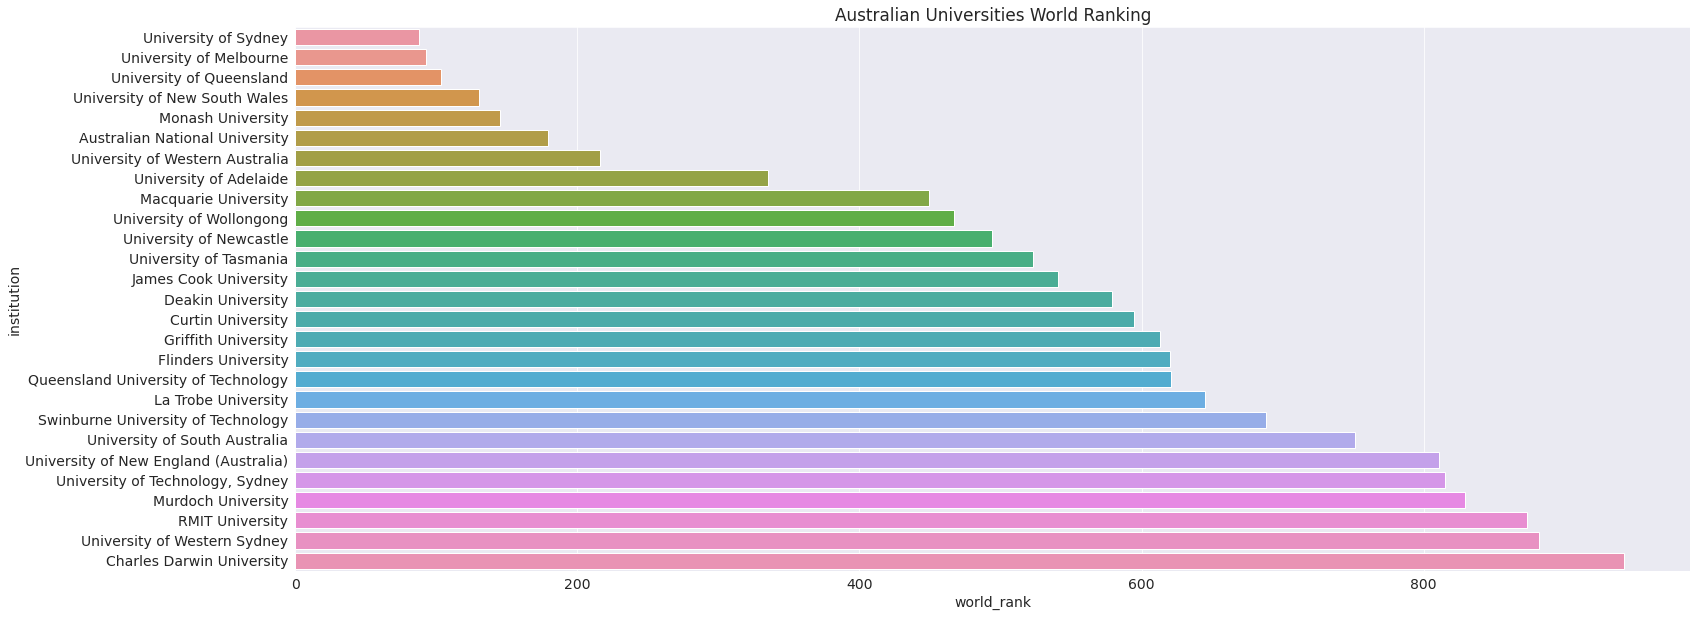

In [27]:
plt.figure(figsize=(25, 10))
plt.title('Australian Universities World Ranking')

sns.barplot(aus_2015.world_rank, aus_2015.institution);

The Above figure shows the world ranking of Australian Universities.

National Ranking of Australian Universities.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


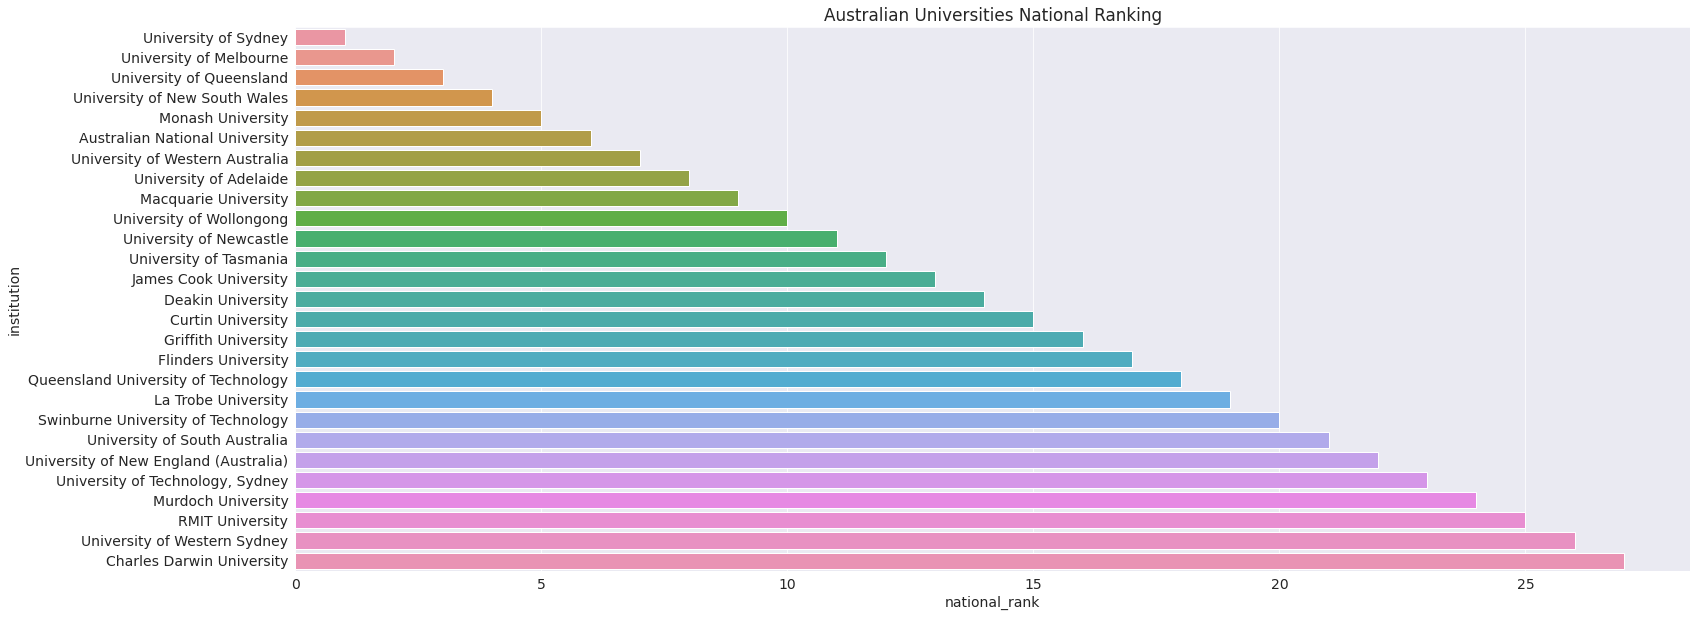

In [28]:
plt.figure(figsize=(25,10))
plt.title('Australian Universities National Ranking')

sns.barplot(aus_2015.national_rank, aus_2015.institution);

The Above figure shows the national ranking of Australian Universities.

Average World rank of Australian Universities

In [29]:
avg_rank = aus_2015.world_rank.sum()/27

In [30]:
avg_rank

519.5185185185185

Average Quality of Education of Australian Universities.

In [31]:
avg_quality_of_education = aus_2015.quality_of_education.sum()/27

In [32]:
avg_quality_of_education

306.22222222222223

Average Alumni Employment of Australian Universities.

In [33]:
avg_alumni_employment = aus_2015.alumni_employment.sum()/27

In [34]:
avg_alumni_employment

417.4074074074074

## Asking and Answering Questions

Coming up with insights.



#### Q1: Is there a direct correlation between national rank and world rank?

Let us analyze the dataframe of Australian universities for the year 2015.

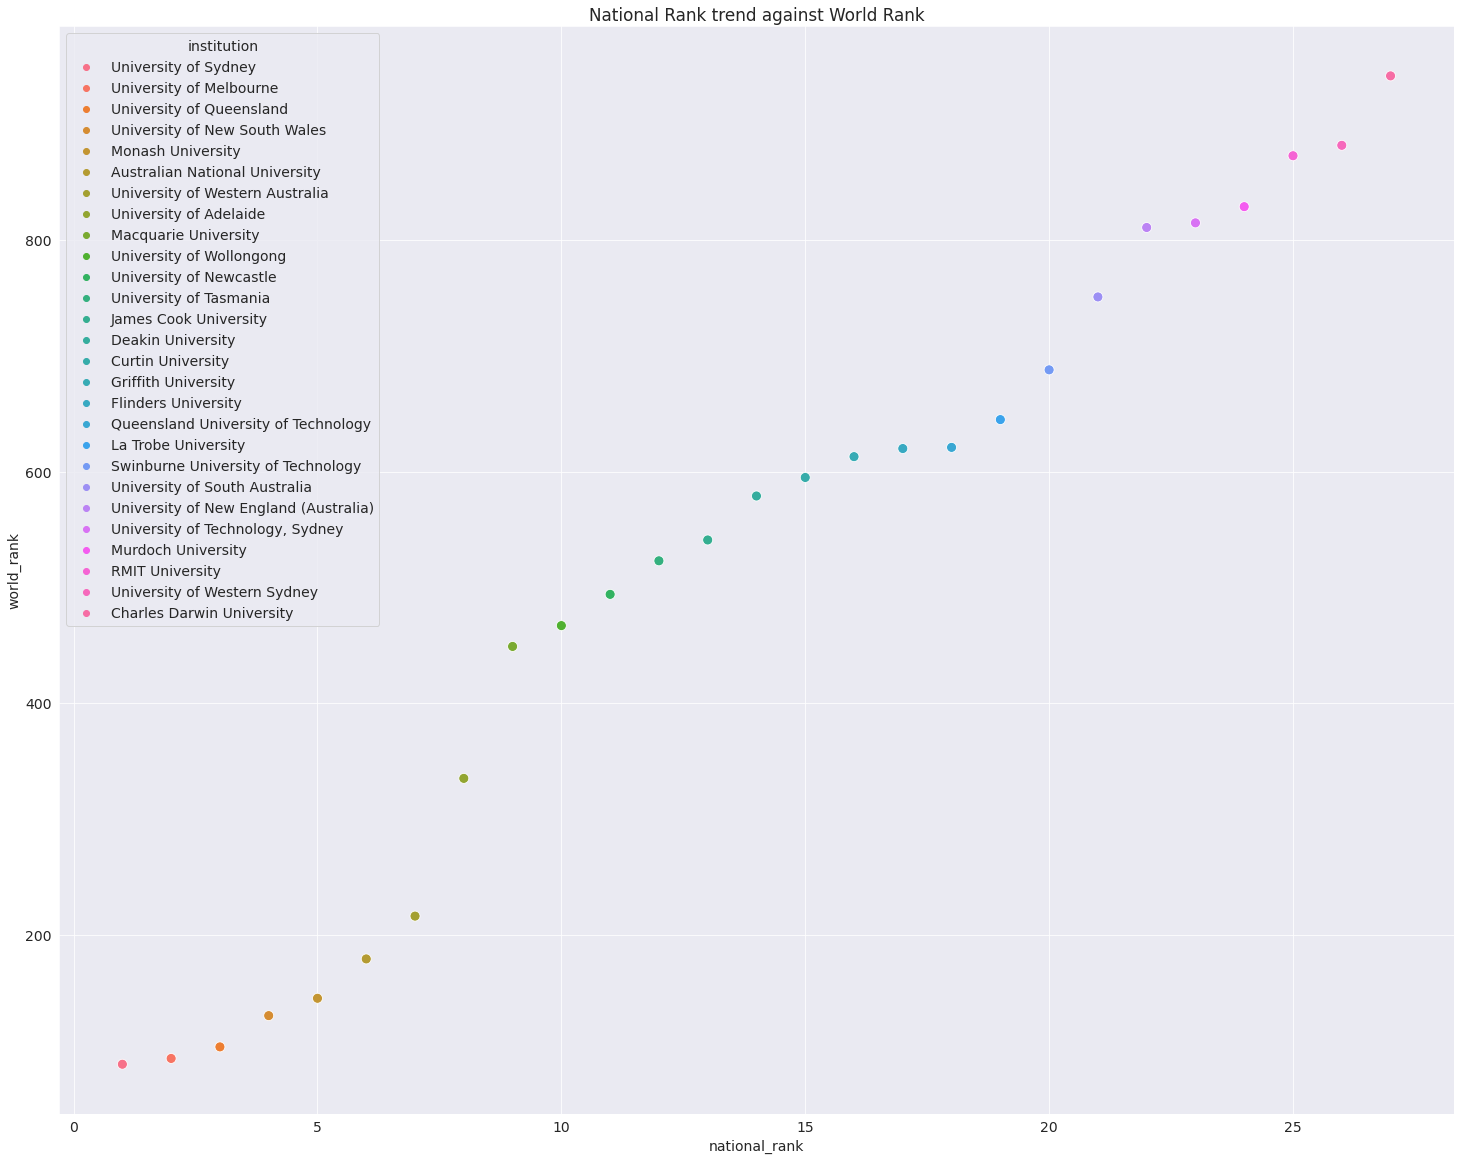

In [37]:
plt.figure(figsize=(25, 20))
plt.title('National Rank trend against World Rank')

sns.scatterplot(x=aus_2015.national_rank, y=aus_2015.world_rank, hue=aus_2015.institution, s=100);

From the visualization above, there seems to be a direct correlation. Thus, improvement in National rank of a university can lead to the improvement of its World rank.

#### Q2: Does increasing the number of annual publications improve the ranking of a university?

We are going to use the previous dataframe for this visualization as well. 

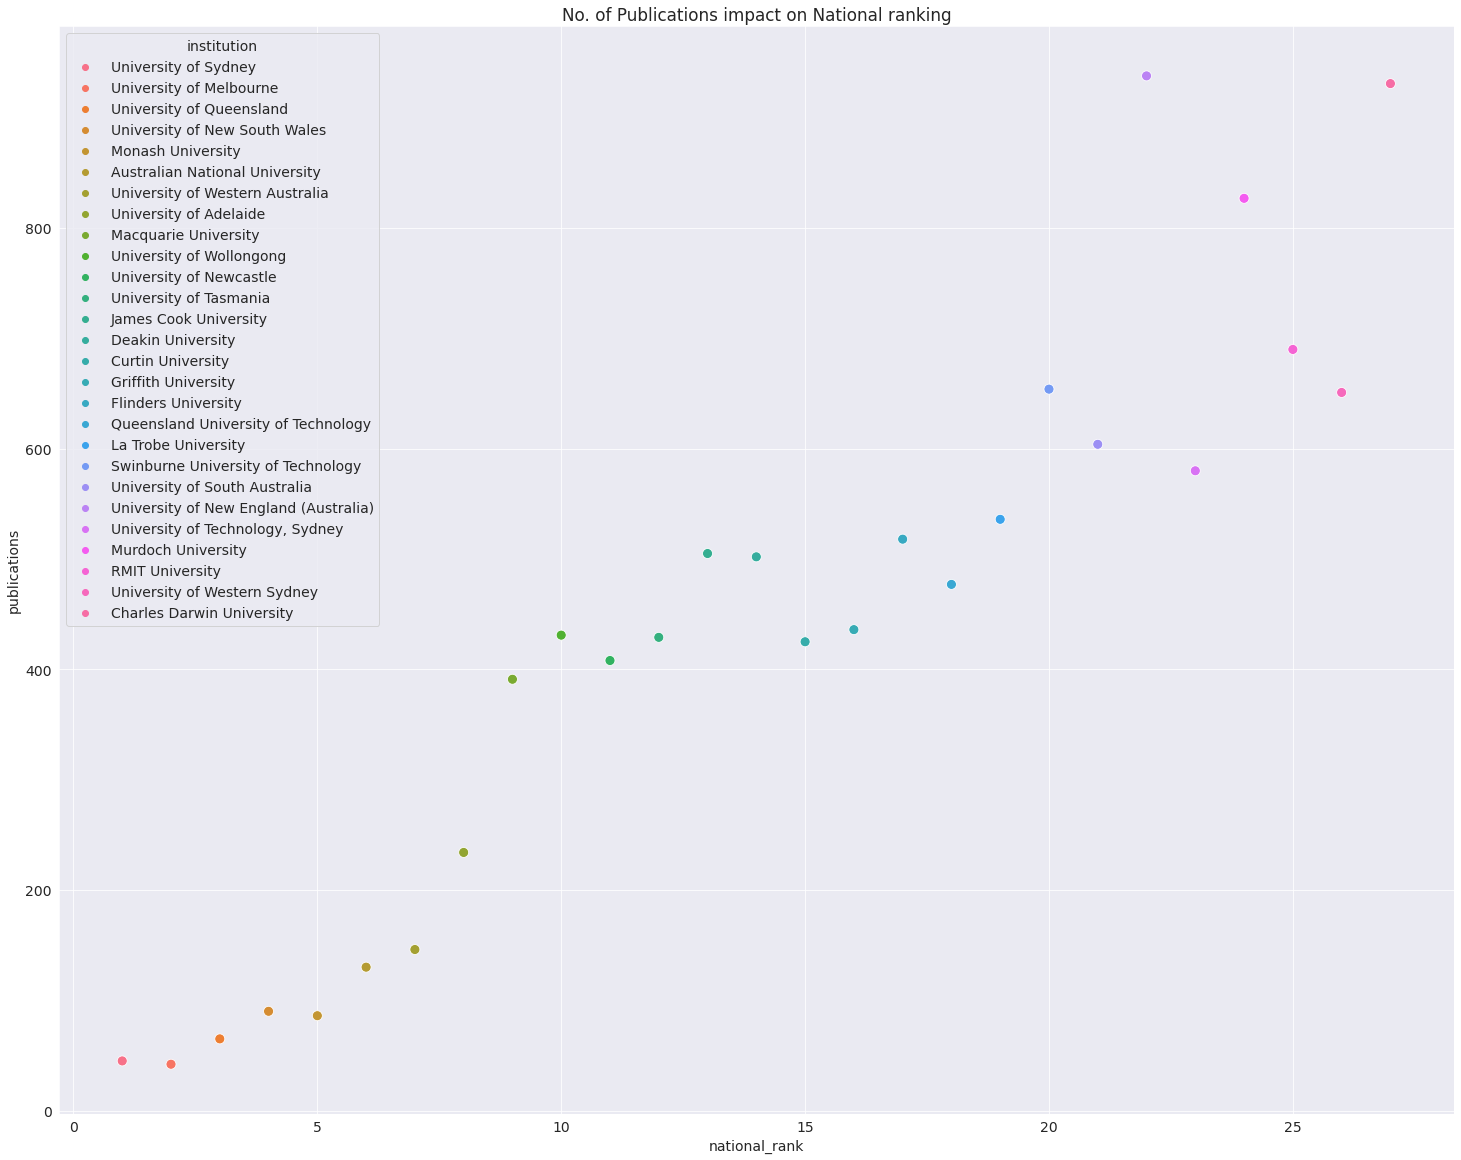

In [38]:
plt.figure(figsize=(25, 20))
plt.title('No. of Publications impact on National ranking')

sns.scatterplot(x=aus_2015.national_rank, y=aus_2015.publications, hue=aus_2015.institution, s=100);

Counterintuitive to what we may have thought to be the case, it is completely false. The national rank increases as the number of publications produced by an institution increases.

#### Q3: Does improving the quality of education lead to better alumni employment?

For this we are going to analyze the trend using the data of Australian National University and University of Queensland.

In [39]:
anu = australian_universities_df[australian_universities_df.institution == 'Australian National University']

In [40]:
anu

,institution,country,world_rank,national_rank,publications,quality_of_education,alumni_employment,quality_of_faculty,year
195,Australian National University,Australia,96,2,101,101,101,43,2013
359,Australian National University,Australia,160,5,137,186,377,47,2014
1378,Australian National University,Australia,179,6,130,196,379,52,2015


In [41]:
uni_of_queensland = australian_universities_df[australian_universities_df.institution == 'University of Queensland']

In [42]:
uni_of_queensland

,institution,country,world_rank,national_rank,publications,quality_of_education,alumni_employment,quality_of_faculty,year
91,University of Queensland,Australia,92,1,67,101,101,101,2012
314,University of Queensland,Australia,115,3,75,265,295,134,2014
1302,University of Queensland,Australia,103,3,65,269,292,142,2015


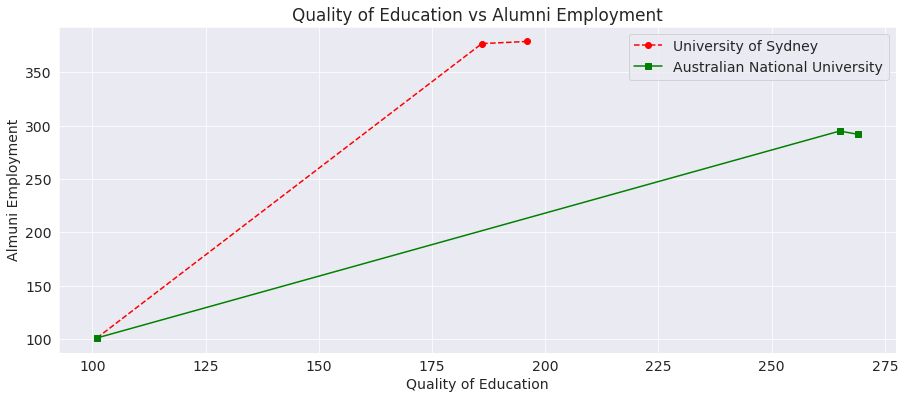

In [43]:
plt.figure(figsize=(15, 6))
plt.plot(anu.quality_of_education, anu.alumni_employment, 'o--r')
plt.plot(uni_of_queensland.quality_of_education, uni_of_queensland.alumni_employment, 's-g')


plt.xlabel('Quality of Education')
plt.ylabel('Almuni Employment')

plt.title("Quality of Education vs Alumni Employment")
plt.legend(['University of Sydney', 'Australian National University', 'University of Queensland']);

From the visualization above, it can be inferred that improving the quality of education leads to better alumni employment.

#### Q4: Has Australian National University been able to improve its world rank?

We analyze data for the Australian National University.

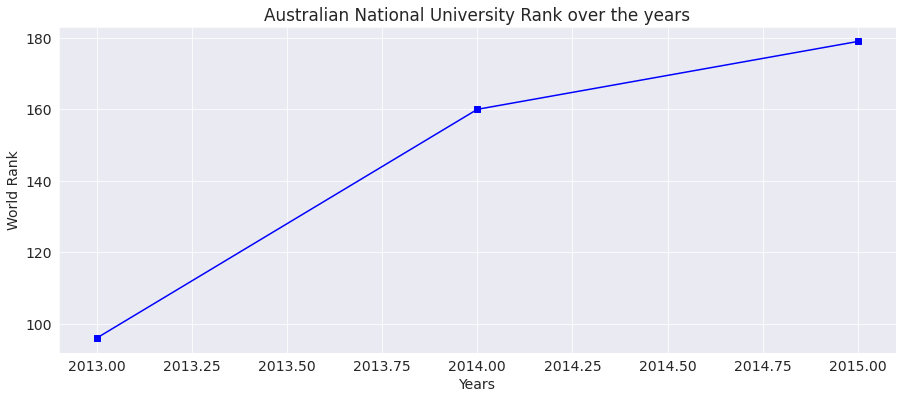

In [44]:
plt.figure(figsize=(15, 6))
plt.plot(anu.year, anu.world_rank, 's-b')

plt.xlabel('Years')
plt.ylabel('World Rank')

plt.title("Australian National University Rank over the years");

No, the world rank of Australian National University has deteriorated in the period 2013 to 2015 from 96 to 179. 

#### Q5: What is the correlation between quality of education and quality of faculty?

For this we are going to analyze the data for University of Queensland.

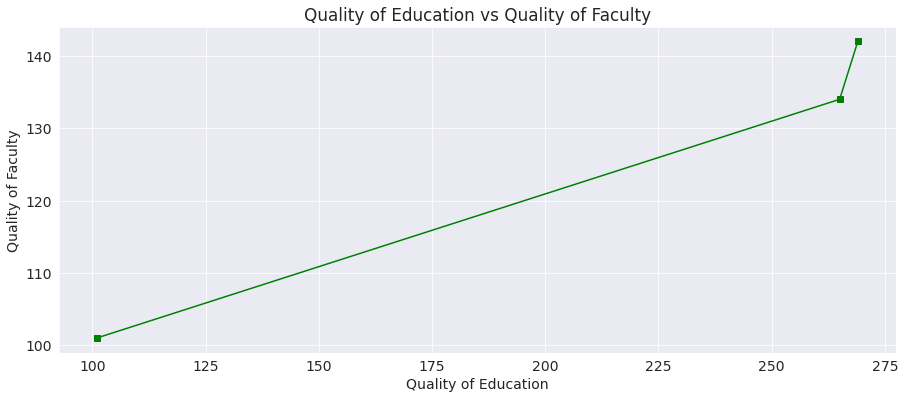

In [45]:
plt.figure(figsize=(15, 6))

plt.plot(uni_of_queensland.quality_of_education, uni_of_queensland.quality_of_faculty, 's-g')

plt.xlabel('Quality of Education')
plt.ylabel('Quality of Faculty')

plt.title("Quality of Education vs Quality of Faculty");

There is a strong positive direct correlation between quality of education and quality of faculty.

## Inferences and Conclusion

**TODO** - From the analysis above, following conclusions can be drawn:

1) There is a direct correlation between national rank and world rank.

2) There is an inverse correlation between national rank and number of publications produced an Institution.

3) Improving the quality of education leads to better alumni employment.

4) The world rank of Australian National University deteriorated in the period 2013 to 2015.

5) There is a strong positive direct correlation between quality of education and quality of faculty.